In [2]:
  import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
data=pd.read_csv('amazon2.tsv',sep='\t')
print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [4]:
print(f"Feature names : {data.columns.values}")

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [5]:
# View the first few rows of the data
print(data.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  


In [6]:
#information about the data type
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB
None


In [7]:
#checking for null values
data.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,1
feedback,0


In [8]:
#for removing null values
data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [9]:
data.dropna(inplace=True)

In [10]:
#adding new column
data['length'] = data['verified_reviews'].apply(len)

In [11]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [12]:
data[data.duplicated()].shape

(715, 6)

In [13]:
data[data.duplicated()]

,rating,date,variation,verified_reviews,feedback,length
700,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,172
701,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1,365
702,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1,221
703,5,30-Jul-18,Heather Gray Fabric,looks great,1,11
704,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1,114
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [14]:
#droppingduplicated data
data = data.drop_duplicates()
data.shape

(2434, 6)

In [15]:
print(f"Rating  value counts:\n{data['rating'].value_counts()}")

Rating  value counts:
rating
5    1756
4     345
1     141
3     113
2      79
Name: count, dtype: int64


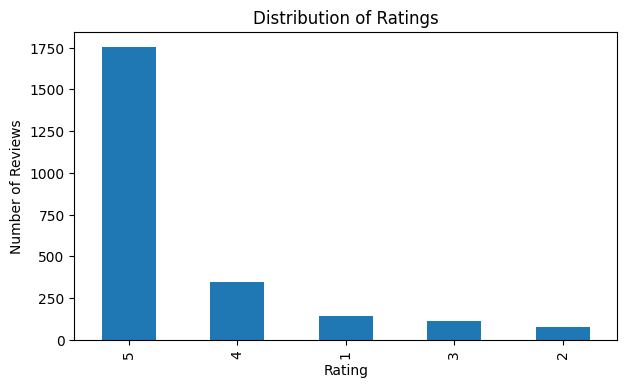

In [16]:
# bar graphfor ratings distribution
plt.figure(figsize=(7, 4))
data['rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()


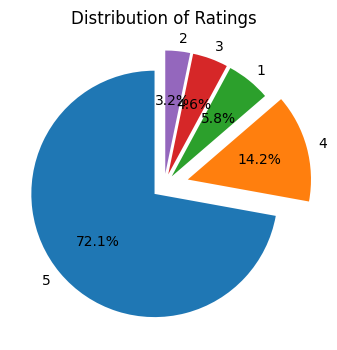

In [17]:

# Assuming 'data' DataFrame from the previous code is still available.
rating_counts = data['rating'].value_counts()
rating_percentages = (rating_counts / rating_counts.sum()) * 100

plt.figure(figsize=(6, 4))


explode=(0.1,0.2,0.1,0.1,0.1)
plt.pie(rating_percentages, labels=rating_percentages.index,explode=explode, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Ratings')
  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [18]:

print(data['feedback'].value_counts()) # Frequency of each unique feedback


feedback
1    2214
0     220
Name: count, dtype: int64


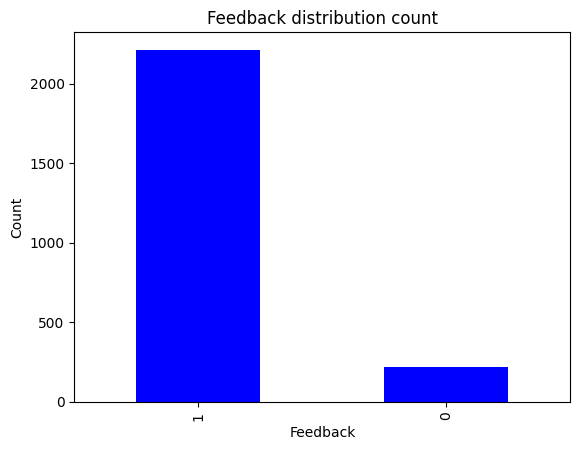

In [19]:
#Bar graph to visualize the total counts of each feedback

data['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()


In [20]:
# percentage distribution: for -ve and +ve feed back
print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    90.96
0     9.04
Name: count, dtype: float64


In [21]:
data[data['feedback']==0]['rating'].value_counts()

,count
rating,
1,141
2,79


In [22]:
data[data['feedback']==1]['rating'].value_counts()

,count
rating,
5,1756
4,345
3,113


In [23]:
print(f"variation value count: \n{data['variation'].value_counts()}")

variation value count: 
variation
Configuration: Fire TV Stick    342
Black  Plus                     270
Black                           261
Black  Show                     260
Black  Dot                      252
Black  Spot                     241
Charcoal Fabric                 219
White  Spot                     108
White  Dot                       92
White                            90
White  Show                      85
Heather Gray Fabric              79
White  Plus                      78
Sandstone Fabric                 45
Oak Finish                        7
Walnut Finish                     5
Name: count, dtype: int64


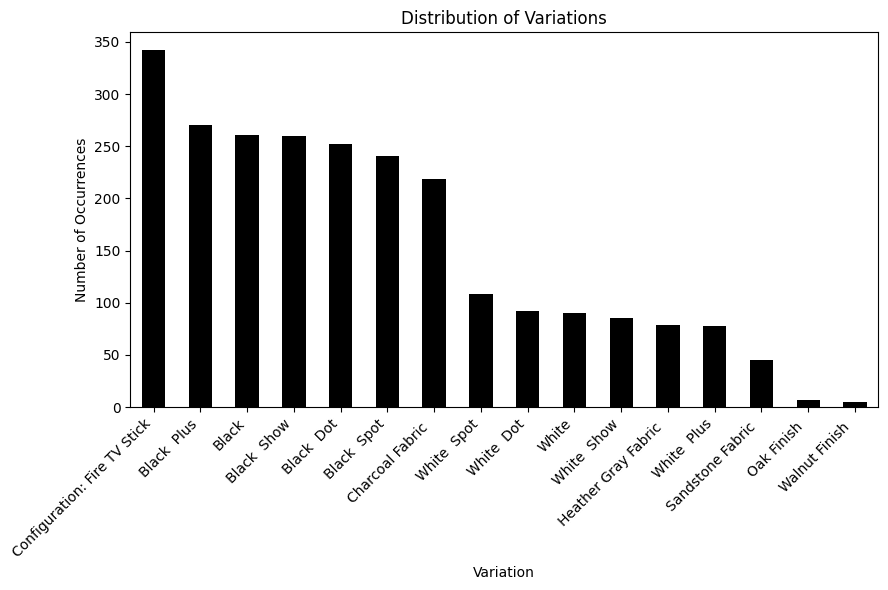

In [24]:

variation_counts = data['variation'].value_counts()

plt.figure(figsize=(9, 6))
variation_counts.plot(kind='bar', color='black')
plt.title('Distribution of Variations')
plt.xlabel('Variation')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [25]:
variation_counts = data['variation'].value_counts()
variation_percentages = (variation_counts / variation_counts.sum()) * 100
print(variation_percentages)


variation
Configuration: Fire TV Stick    14.050945
Black  Plus                     11.092851
Black                           10.723090
Black  Show                     10.682005
Black  Dot                      10.353328
Black  Spot                      9.901397
Charcoal Fabric                  8.997535
White  Spot                      4.437141
White  Dot                       3.779786
White                            3.697617
White  Show                      3.492194
Heather Gray Fabric              3.245686
White  Plus                      3.204601
Sandstone Fabric                 1.848809
Oak Finish                       0.287592
Walnut Finish                    0.205423
Name: count, dtype: float64


In [26]:


# Calculate the mean rating for each variation
variation_mean_ratings = data.groupby('variation')['rating'].mean()

# Print the mean rating for each variation
print(f"Mean rating for each variation:\n{variation_mean_ratings}")




Mean rating for each variation:
variation
Black                           4.233716
Black  Dot                      4.452381
Black  Plus                     4.370370
Black  Show                     4.480769
Black  Spot                     4.311203
Charcoal Fabric                 4.735160
Configuration: Fire TV Stick    4.590643
Heather Gray Fabric             4.696203
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.800000
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.342593
Name: rating, dtype: float64


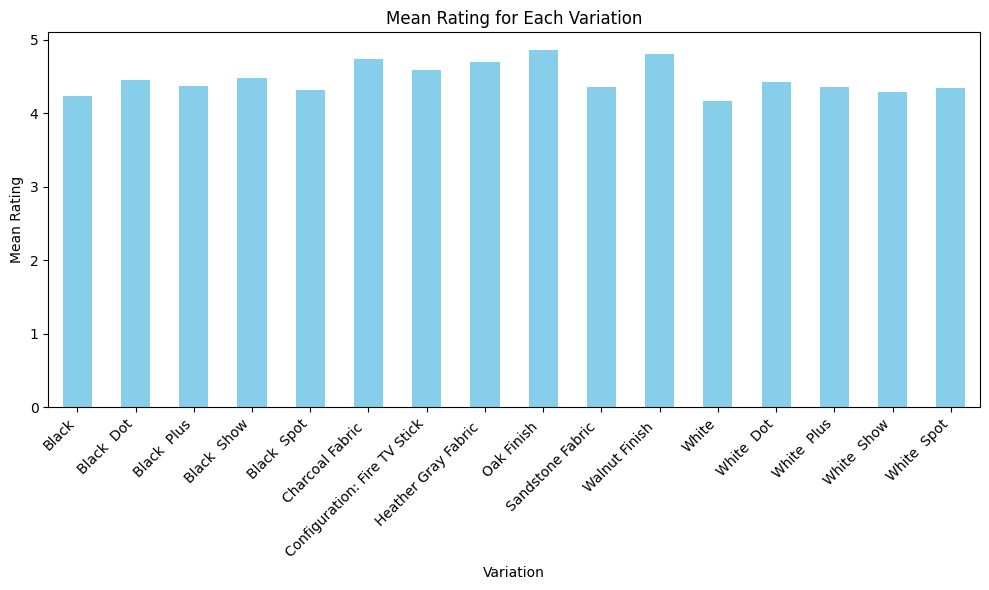

In [27]:
# Create a bar plot of the mean ratings for each variation
plt.figure(figsize=(10, 6))
variation_mean_ratings.plot(kind='bar', color='skyblue')
plt.title('Mean Rating for Each Variation')
plt.xlabel('Variation')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Analyzing 'verified_reviews' column**

In [28]:
data['length'].describe()


,length
count,2434.000000
mean,137.954396
std,192.418052
min,1.000000
25%,31.000000
50%,77.000000
75%,170.750000
max,2851.000000


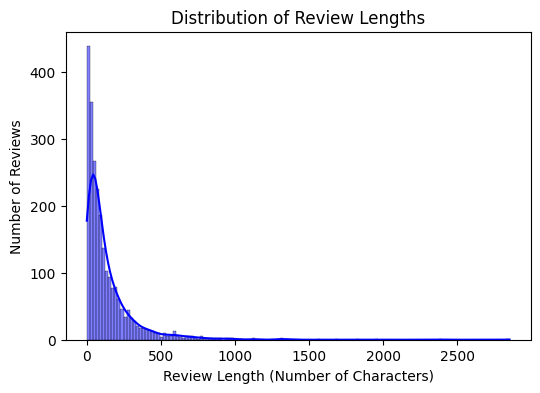

In [29]:
plt.figure(figsize=(6, 4 ))
sns.histplot(data['length'], color = 'blue',kde=True)  # Use seaborn's histplot for better visualization
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Number of Characters)')
plt.ylabel('Number of Reviews')
plt.show()


Text(0.5, 1.0, 'Distribution of Review Lengths when feedback is 0')

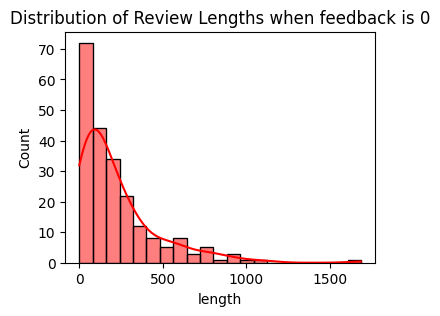

In [30]:
plt.figure(figsize=(4, 3 ))
sns.histplot(data[data['feedback']==0]['length'], color = 'red',kde=True)
plt.title('Distribution of Review Lengths when feedback is 0')

Text(0.5, 1.0, 'Distribution of Review Lengths when feedback is 1')

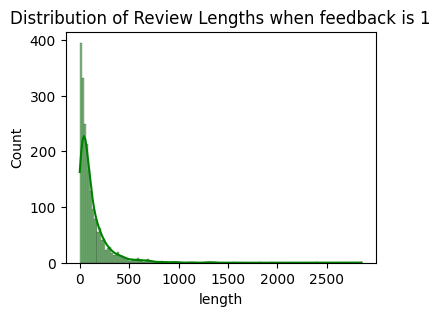

In [31]:
plt.figure(figsize=(4, 3 ))
sns.histplot(data[data['feedback']==1]['length'], color = 'green',kde=True)
plt.title('Distribution of Review Lengths when feedback is 1')

In [32]:
correlation_matrix = data.corr(numeric_only=True)
print(correlation_matrix)

            rating  feedback    length
rating    1.000000  0.875107 -0.198916
feedback  0.875107  1.000000 -0.141230
length   -0.198916 -0.141230  1.000000


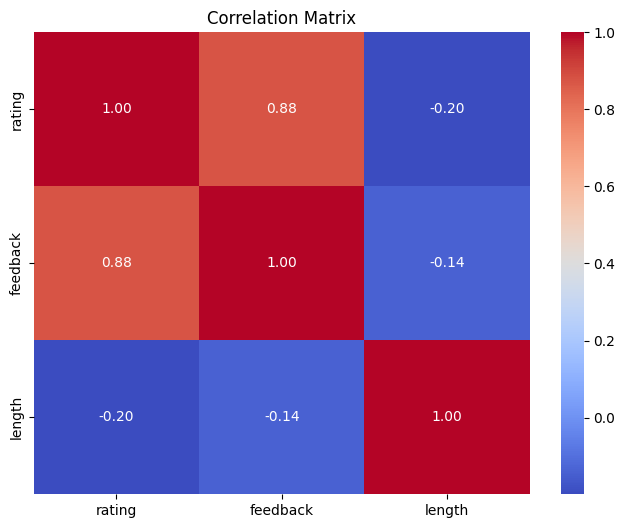

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [34]:
pip install wordcloud

In [35]:
%pip install wordcloud

In [36]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

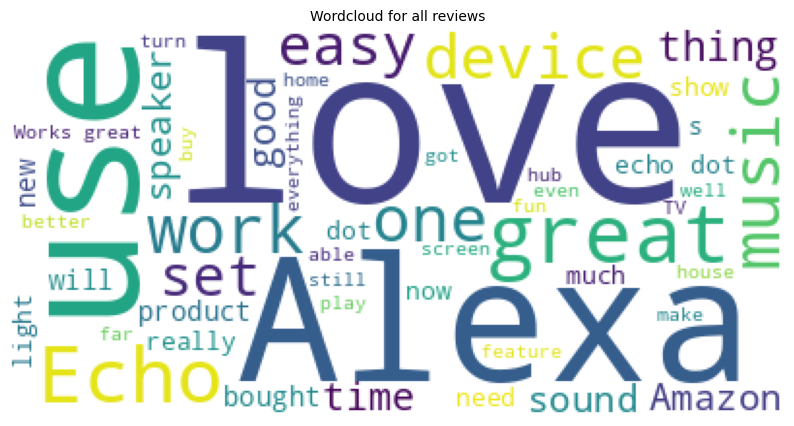

In [37]:
reviews = " ".join([review for review in data['verified_reviews']])
# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [38]:
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

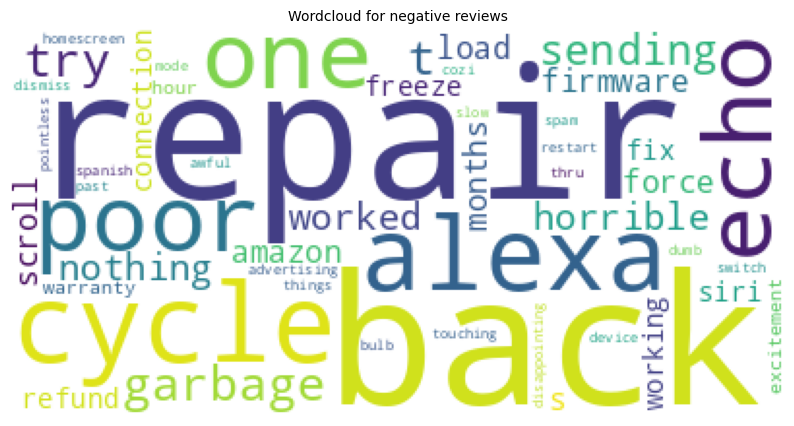

In [39]:
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()


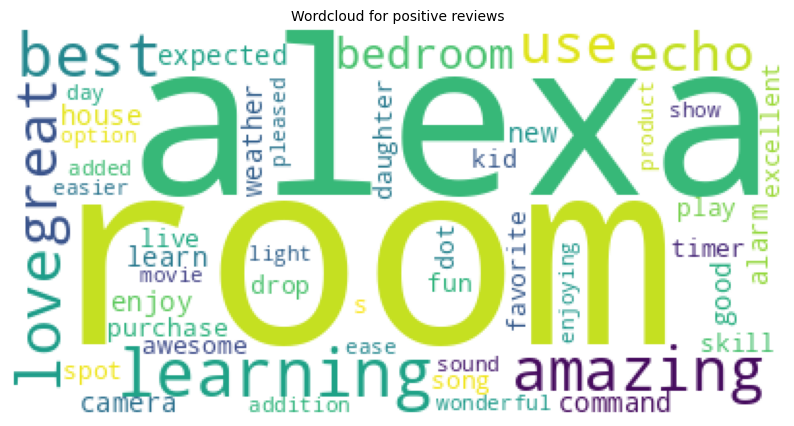

In [40]:

wc = WordCloud(background_color='white', max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

### **Data Cleaning**

In [41]:

corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)


In [42]:
print(corpus)

['love echo', 'love', 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home', 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well', 'music', 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els', 'without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet', 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous', 'look great', 'love listen song heard sinc childhood get news weather inform great', 'sent year old dad talk constantli', 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time', 'purchas mother knee problem give someth tri come get around fast like enjoy littl big thing alexa play song

In [43]:
data['cleaned_reviews'] = corpus

X = data["cleaned_reviews"]
y = data["feedback"]

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X = data["cleaned_reviews"]
y = data["feedback"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE # Import SMOTE

# Assuming X_train_tfidf, y_train are defined from previous cells

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

model_lr = LogisticRegression(class_weight='balanced', max_iter=1000)
model_lr.fit(X_train_balanced, y_train_balanced)
y_pred_lr = model_lr.predict(X_test_tfidf)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:
Accuracy: 0.839835728952772
              precision    recall  f1-score   support

           0       0.38      0.69      0.49        54
           1       0.96      0.86      0.91       433

    accuracy                           0.84       487
   macro avg       0.67      0.77      0.70       487
weighted avg       0.89      0.84      0.86       487



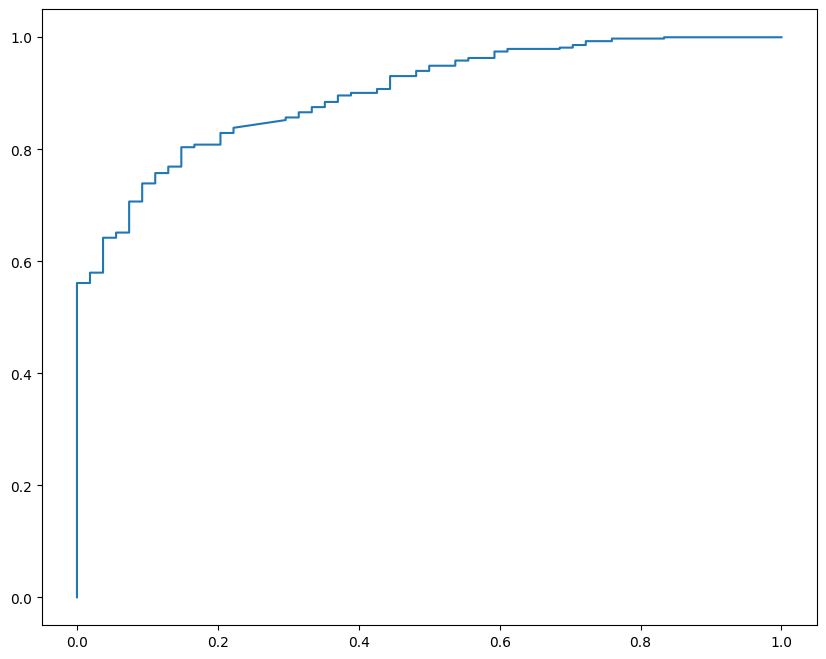

In [46]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

plt.figure(figsize=(10, 8))

# Logistic Regression
model_lr = LogisticRegression()  # Initialize the model
model_lr.fit(X_train_tfidf, y_train)  # Train the model
y_score_lr = model_lr.predict_proba(X_test_tfidf)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.2f})")

In [47]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE # import SMOTE

# Assuming X_train_tfidf, y_train are defined from previous cells

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(X_train_balanced, y_train_balanced) # Now using balanced data
y_pred_rf = model_rf.predict(X_test_tfidf)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.8870636550308009
              precision    recall  f1-score   support

           0       0.49      0.43      0.46        54
           1       0.93      0.94      0.94       433

    accuracy                           0.89       487
   macro avg       0.71      0.69      0.70       487
weighted avg       0.88      0.89      0.88       487



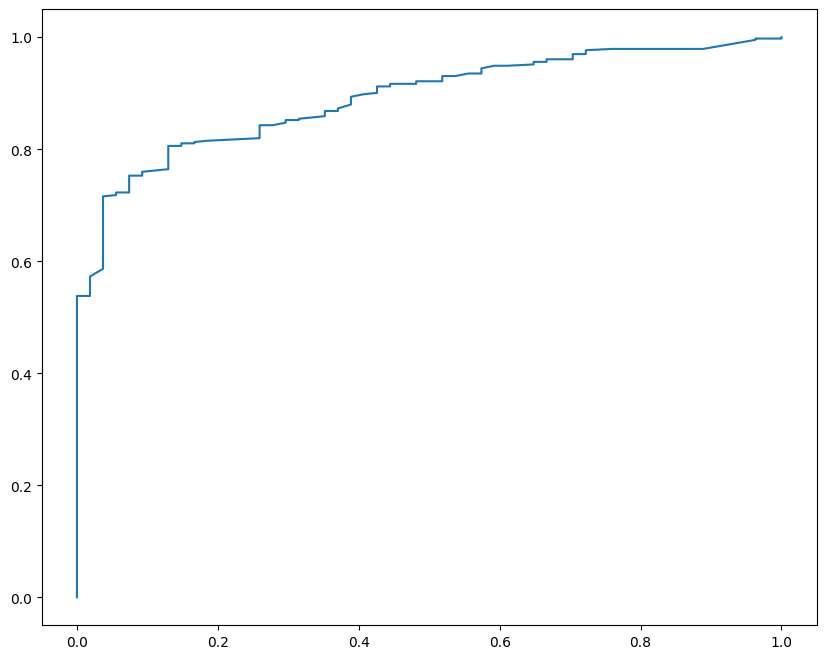

In [48]:
plt.figure(figsize=(10, 8))
# Random Forest
y_score_rf = model_rf.predict_proba(X_test_tfidf)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})")

In [49]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model_dt.fit(X_train_balanced, y_train_balanced)
y_pred_dt = model_dt.predict(X_test_tfidf)

print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Results:
Accuracy: 0.839835728952772
              precision    recall  f1-score   support

           0       0.34      0.46      0.39        54
           1       0.93      0.89      0.91       433

    accuracy                           0.84       487
   macro avg       0.63      0.67      0.65       487
weighted avg       0.86      0.84      0.85       487



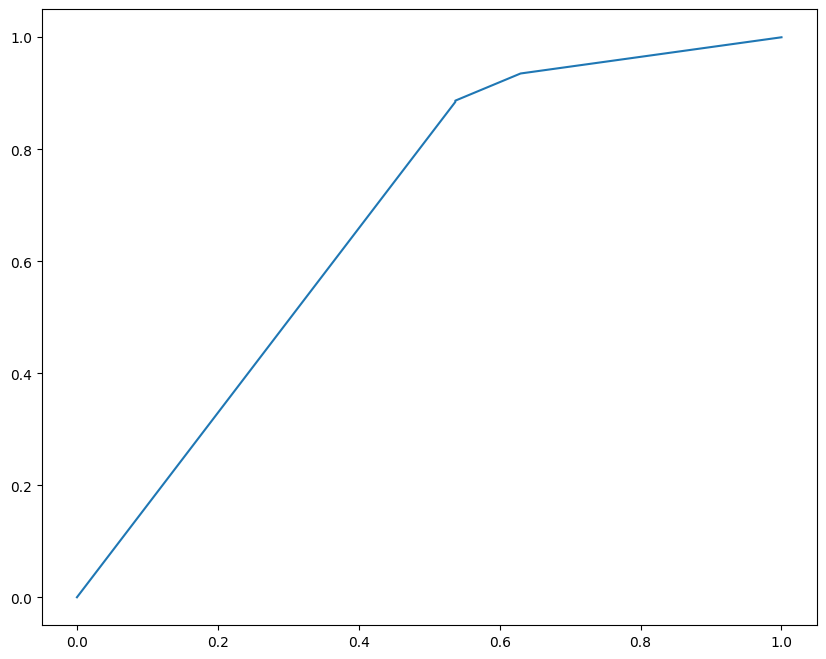

In [50]:
plt.figure(figsize=(10, 8))
# Decision Tree
y_score_dt = model_dt.predict_proba(X_test_tfidf)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc(fpr_dt, tpr_dt):.2f})")

In [51]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(X_train_balanced, y_train_balanced)
y_pred_nb = model_nb.predict(X_test_tfidf)

print("Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Results:
Accuracy: 0.8993839835728953
              precision    recall  f1-score   support

           0       0.54      0.63      0.58        54
           1       0.95      0.93      0.94       433

    accuracy                           0.90       487
   macro avg       0.75      0.78      0.76       487
weighted avg       0.91      0.90      0.90       487



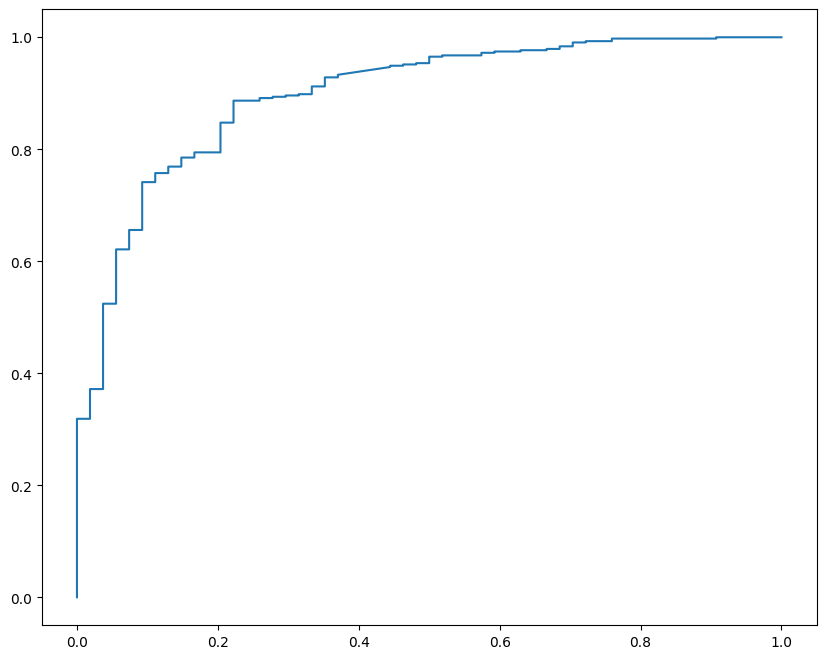

In [52]:
plt.figure(figsize=(10, 8))
# Naive Bayes
y_score_nb = model_nb.predict_proba(X_test_tfidf)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc(fpr_nb, tpr_nb):.2f})")

In [53]:
from sklearn.svm import SVC

model_svm = SVC(class_weight='balanced', random_state=42)
model_svm.fit(X_train_balanced, y_train_balanced)
y_pred_svm = model_svm.predict(X_test_tfidf)

print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Results:
Accuracy: 0.8870636550308009
              precision    recall  f1-score   support

           0       0.47      0.13      0.20        54
           1       0.90      0.98      0.94       433

    accuracy                           0.89       487
   macro avg       0.68      0.56      0.57       487
weighted avg       0.85      0.89      0.86       487



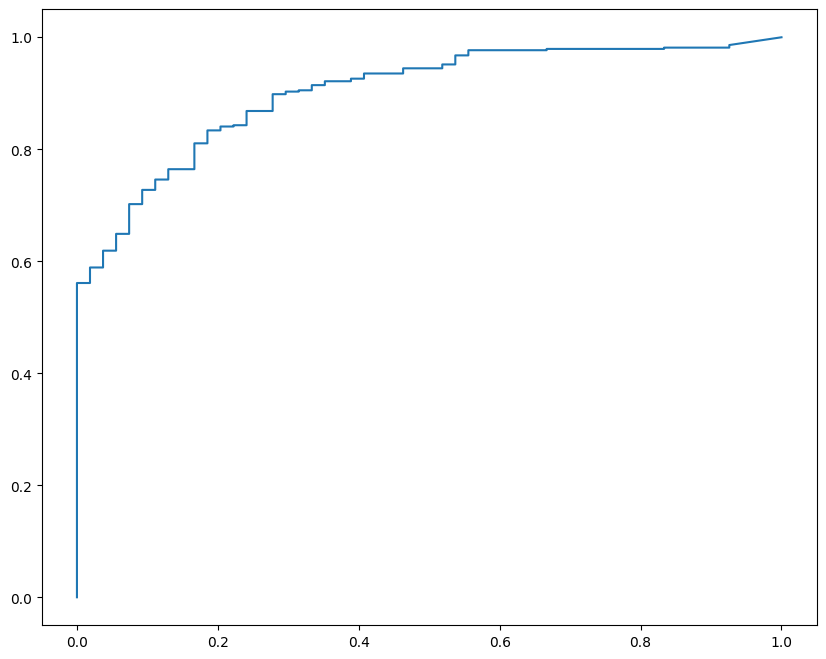

In [54]:
plt.figure(figsize=(10, 8))
# SVM
# For SVM, use decision_function instead of predict_proba
y_score_svm = model_svm.decision_function(X_test_tfidf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc(fpr_svm, tpr_svm):.2f})")

<ipython-input-55-6701b1042fad>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=result_df, palette="magma")


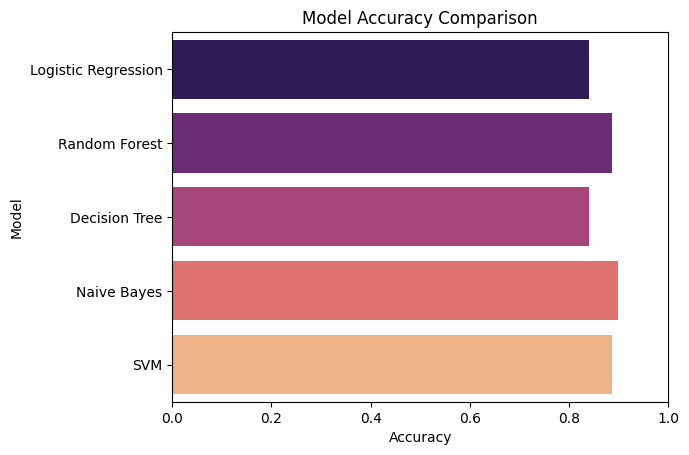

In [55]:
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

result_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
sns.barplot(x="Accuracy", y="Model", data=result_df, palette="magma")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:42:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


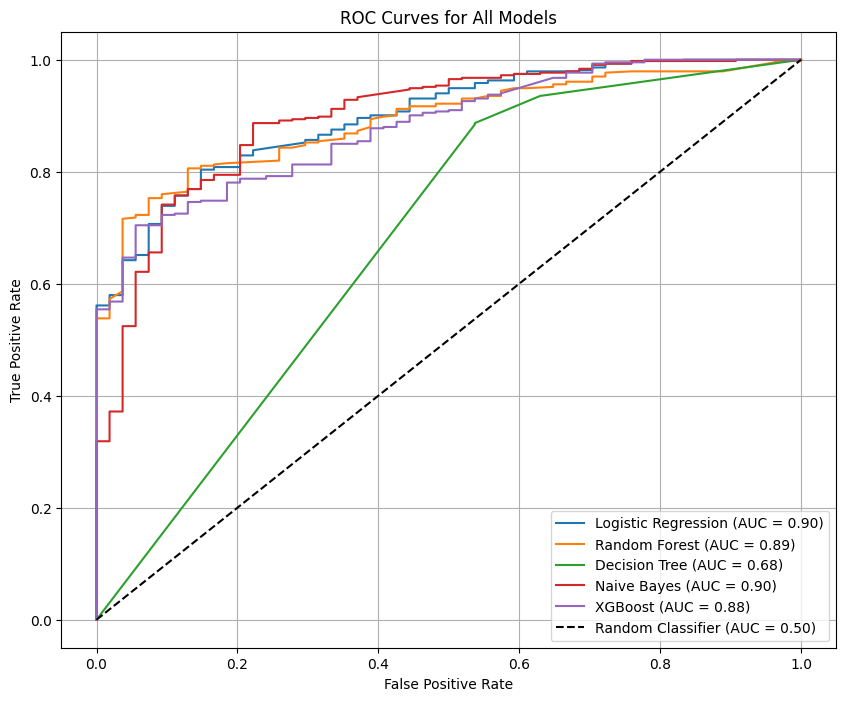

In [56]:
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

plt.figure(figsize=(10, 8))

# Logistic Regression
y_score_lr = model_lr.predict_proba(X_test_tfidf)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.2f})")

# Random Forest
y_score_rf = model_rf.predict_proba(X_test_tfidf)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})")

# Decision Tree
y_score_dt = model_dt.predict_proba(X_test_tfidf)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc(fpr_dt, tpr_dt):.2f})")

# Naive Bayes
y_score_nb = model_nb.predict_proba(X_test_tfidf)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc(fpr_nb, tpr_nb):.2f})")

# Fit XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_balanced, y_train_balanced)
y_proba_xgb = xgb_model.predict_proba(X_test_tfidf)[:, 1]

# Calculate fpr, tpr, and roc_auc for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)  # Calculate these values
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)  # Calculate AUC

# Now you can plot
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")


# SVM
model_svm = SVC(class_weight='balanced', probability=True)
model_svm.fit(X_train_balanced, y_train_balanced)
y_score_svm = model_svm.predict_proba(X_test_tfidf)[:, 1]

# Plot Random baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.50)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [57]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import pandas as pd

# Replace these with your actual trained model objects
# Assuming model_lr, model_rf, model_dt, model_svm, model_nb were used during training
models = {
    "Logistic Regression": model_lr,  # Changed logistic_model to model_lr
    "Random Forest": model_rf,  # Changed rf_model to model_rf
    "Decision Tree": model_dt,  # Changed dt_model to model_dt
    "SVM": model_svm,
    "Naive Bayes": model_nb,
    "XGBoost": xgb_model
}

# Evaluate each model
results = []
for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    results.append([name, acc, precision, recall, f1])

# Create DataFrame
metrics_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision (Macro)", "Recall (Macro)", "F1 Score (Macro)"])
metrics_df.sort_values(by="F1 Score (Macro)", ascending=False, inplace=True)
metrics_df.reset_index(drop=True, inplace=True)

# Show rounded results
print(metrics_df.round(4))

                 Model  Accuracy  Precision (Macro)  Recall (Macro)  \
0          Naive Bayes    0.8994             0.7463          0.7813   
1        Random Forest    0.8871             0.7095          0.6852   
2              XGBoost    0.8645             0.6725          0.7050   
3        Decision Tree    0.8398             0.6338          0.6749   
4                  SVM    0.8871             0.6835          0.5556   
5  Logistic Regression    0.8912             0.9455          0.5093   

   F1 Score (Macro)  
0            0.7620  
1            0.6962  
2            0.6864  
3            0.6492  
4            0.5711  
5            0.4893  


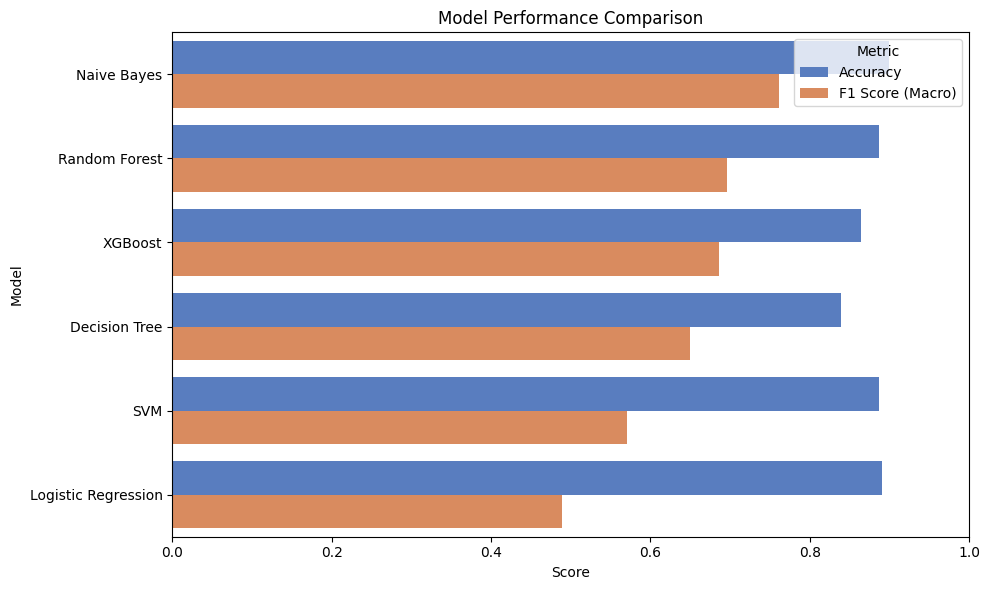

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df.melt(id_vars='Model', value_vars=['Accuracy', 'F1 Score (Macro)']),
            x='value', y='Model', hue='variable', palette='muted')
plt.title("Model Performance Comparison")
plt.xlabel("Score")
plt.legend(title='Metric')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}

Best XGBoost Accuracy: 0.728952772073922
              precision    recall  f1-score   support

           0       0.26      0.80      0.39        54
           1       0.97      0.72      0.83       433

    accuracy                           0.73       487
   macro avg       0.61      0.76      0.61       487
weighted avg       0.89      0.73      0.78       487



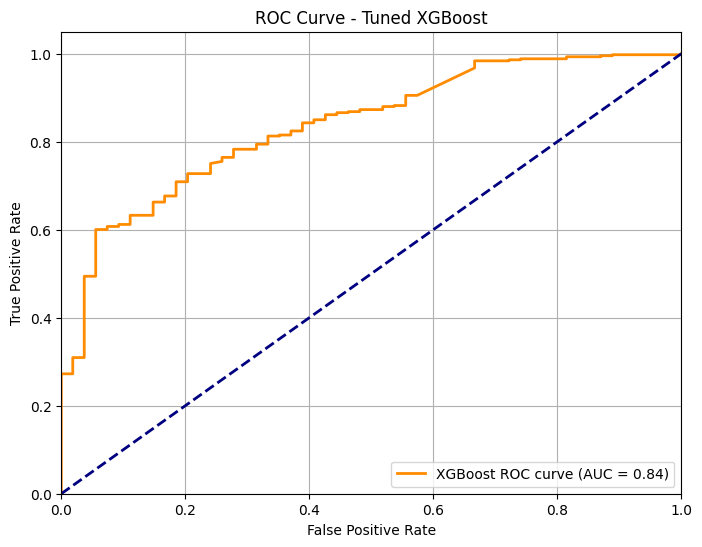

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming you already have these:
# X_train_tfidf, X_test_tfidf, y_train, y_test

# Step 1: Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_tfidf, y_train)
# Step 2: Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.3],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Step 3: Initialize XGBoost Classifier
negative_class = y_train[y_train == 0]
positive_class = y_train[y_train == 1]
xgb = XGBClassifier(scale_pos_weight = len(negative_class) / len(positive_class))

# Step 4: Use GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Step 5: Fit the model
grid_search.fit(X_train_bal, y_train_bal)

# Step 6: Best estimator
best_xgb = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Step 7: Predict and Evaluate
y_pred = best_xgb.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("\nBest XGBoost Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Step 8: ROC Curve
y_proba = best_xgb.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'XGBoost ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned XGBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


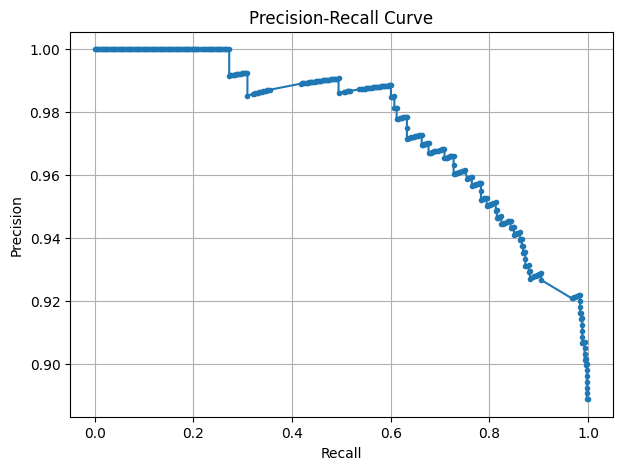

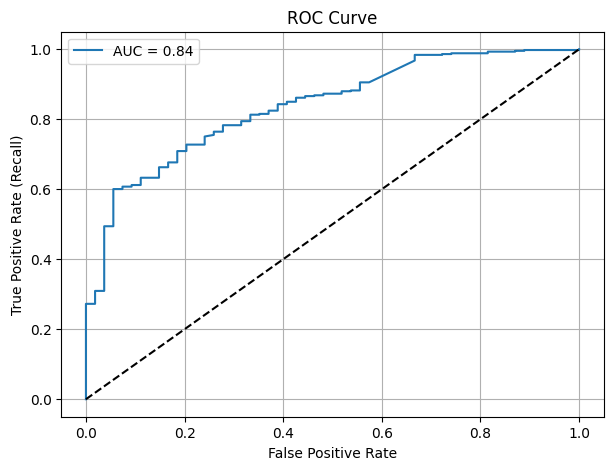

Classification Report with threshold = 0.5
              precision    recall  f1-score   support

           0       0.26      0.80      0.39        54
           1       0.97      0.72      0.83       433

    accuracy                           0.73       487
   macro avg       0.61      0.76      0.61       487
weighted avg       0.89      0.73      0.78       487



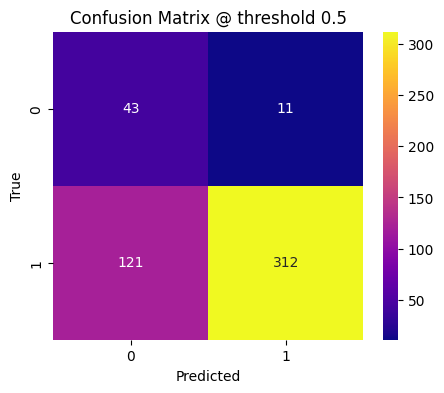

In [60]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities using the fitted model from GridSearchCV
y_proba = best_xgb.predict_proba(X_test_tfidf)[:, 1]  # Probability for class 1

# --- Precision-Recall Curve ---
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# --- ROC Curve ---
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# --- Choose a custom threshold (e.g., 0.4) ---
custom_threshold = 0.5
y_pred_thresh = (y_proba >= custom_threshold).astype(int)

# Evaluate performance
print("Classification Report with threshold = 0.5")
print(classification_report(y_test, y_pred_thresh))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_thresh)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix @ threshold 0.5")
plt.show()

In [61]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_proba = model.predict_proba(X_test_tfidf)[:, 1]  # probabilities for class 1

# Initialize lists to store metrics
thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []
precisions = []
recalls = []
accuracies = []

for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))

# Find the best threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"Best Threshold: {best_threshold}")
print(f"F1-Score: {f1_scores[best_idx]:.4f}")
print(f"Precision: {precisions[best_idx]:.4f}")
print(f"Recall: {recalls[best_idx]:.4f}")
print(f"Accuracy: {accuracies[best_idx]:.4f}")

Best Threshold: 0.15
F1-Score: 0.9546
Precision: 0.9170
Recall: 0.9954
Accuracy: 0.9158


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


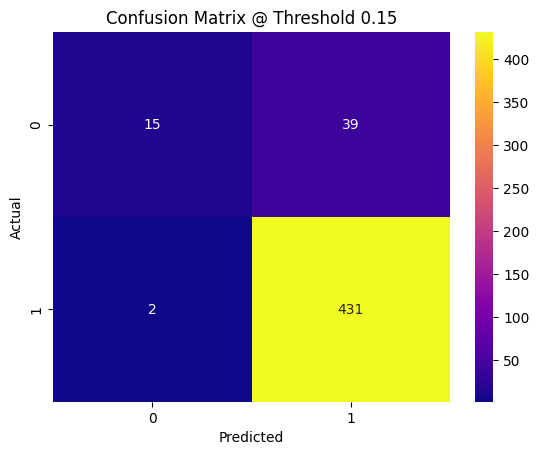

              precision    recall  f1-score   support

           0       0.88      0.28      0.42        54
           1       0.92      1.00      0.95       433

    accuracy                           0.92       487
   macro avg       0.90      0.64      0.69       487
weighted avg       0.91      0.92      0.90       487



In [62]:
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Get predicted probabilities
y_proba = model.predict_proba(X_test_tfidf)[:, 1]

# Initialize lists to store metrics
thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []
precisions = []
recalls = []
accuracies = []

# Calculate metrics for each threshold
for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))

# Find the best threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

# Calculate y_pred_optimal using the best threshold
y_pred_optimal = (y_proba >= best_threshold).astype(int)  # This line was missing

# Now you can use y_pred_optimal in the confusion matrix
cm = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma')
plt.title(f"Confusion Matrix @ Threshold {best_threshold:.2f}") # Dynamic title with threshold
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred_optimal))

In [64]:
import pickle
# Save the model to a file
filename = 'best_xgb_model.sav'
pickle.dump(best_xgb, open(filename, 'wb'))

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

In [65]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline  # Import Pipeline

pipeline = Pipeline([
    ('tfidf', tfidf),  # Your TF-IDF vectorizer (Assuming it's named 'tfidf')
    ('model', model)   # Your trained model (e.g., best_xgb)
])

# Now use the pipeline in cross_val_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, scoring='f1_macro', cv=cv)

print(scores)  # Print the cross-validation scores

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:42:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:42:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:42:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:42:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:42:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[0.73484848 0.68566966 0.72387733 0.66394026 0.75793437]


In [66]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

In [67]:
from sklearn.pipeline import Pipeline
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Create pipeline
# It's better to define the vectorizer inside the pipeline for consistency
# Also, the model here should be the best performing one, likely xgb_model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('clf', xgb_model)
])

# Assuming 'data' is your original DataFrame and you've already handled NaNs earlier.
# If not, ensure NaNs are handled before splitting.
# A safe way is to fill NaNs with empty strings before splitting if dropna is not desired earlier.
data['verified_reviews'] = data['verified_reviews'].fillna('')

X_raw = data['verified_reviews'] # Extract raw reviews for training
y = data['feedback']

# Split data into training and testing sets
# Use X_raw, which now has NaNs filled
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.2, random_state=42
)


# Fit the pipeline
# The pipeline will now handle the vectorization during fitting on the raw text
pipeline.fit(X_train_raw, y_train)

# Save the pipeline
with open("sentiment_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:43:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [68]:
import pickle

with open("sentiment_pipeline.pkl", "rb") as f:
    model = pickle.load(f)

sample_text = ["This product is amazing!"]
pred = model.predict(sample_text)
print(pred)

[1]
